In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
RANDOM_STATE = 17

In [2]:
def save_fig(fig,fig_name,**kwargs):
    # saves the figure to a common folder
    import os
    if not os.path.exists("figures"):
        os.mkdir("figures")
    fig.savefig(fname= "figures/{}".format(fig_name) , **kwargs)
    
def spree_plot(pca_object,fig_title=None,fig_name = None,**kwargs):
    # returns a spree plot from a PCA object
    per_var = np.round(pca_object.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    fig, ax = plt.subplots()
    ax.bar(x = range(1,len(per_var)+1),height=per_var, tick_label=labels)
    ax.set_ylabel('Percentage of Explained Variance')
    ax.set_xlabel('Principal Component')
    if fig_title:
        ax.set_title("Scree Plot")
    else:
        ax.set_title(fig_title)
    if fig_name:
        save_fig(fig,fig_name,**kwargs)

In [3]:
df = pd.read_pickle("../data/2nd_test_full.pkl")
df = df.abs()

In [4]:
period = 20
df1 = df.groupby("timestamp").mean()
df1 = df1.rolling(window = period).mean()
df1.index = pd.to_datetime(df1.index,unit='s')
df1.dropna(inplace = True)

In [5]:
df1

,b1_ch1,b2_ch2,b3_ch3,b4_ch4
timestamp,,,,
2004-02-12 12:42:39,0.061236,0.074751,0.082482,0.044191
2004-02-12 12:52:39,0.061430,0.074955,0.082365,0.044234
2004-02-12 13:02:39,0.061611,0.075076,0.082258,0.044195
2004-02-12 13:12:39,0.061725,0.075110,0.082152,0.044144
2004-02-12 13:22:39,0.061782,0.075243,0.081986,0.044142
...,...,...,...,...
2004-02-19 04:42:39,0.274349,0.135542,0.129159,0.096031
2004-02-19 04:52:39,0.282606,0.135825,0.130421,0.096544
2004-02-19 05:02:39,0.289955,0.136619,0.131351,0.097142


# Nota
Hay que asegurarse que el split del dataset se hace bien con usando train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(df1, test_size=0.3, random_state=RANDOM_STATE)
#df_train = df1[:"2004-02-13 23:52:39"]
#df_test = df1["2004-02-13 23:52:39":]

In [7]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                       columns = X_train.columns,
                       index = X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test),
                      columns = X_test.columns,
                      index = X_test.index)

In [8]:
pca_train = PCA(random_state = RANDOM_STATE)
labels = [f"PCA{i}" for i in range(1,5)]
pca_train.fit(X_train)
X_train_PCA = pca_train.transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA,index =X_train.index,columns = labels )
X_train_PCA

,PCA1,PCA2,PCA3,PCA4
timestamp,,,,
2004-02-15 02:12:39,-0.981399,-0.120081,0.061521,0.005294
2004-02-16 01:02:39,-0.956432,-0.097379,0.033319,0.038161
2004-02-14 04:22:39,-0.840389,-0.210250,0.066615,-0.017600
2004-02-13 06:32:39,-0.743316,-0.330543,-0.036095,-0.021268
2004-02-13 23:32:39,-0.861095,-0.205678,0.027896,-0.024044
...,...,...,...,...
2004-02-15 08:22:39,-0.998273,-0.105784,0.059347,0.012514
2004-02-15 05:42:39,-0.998880,-0.100433,0.068431,-0.011115
2004-02-13 12:32:39,-0.760943,-0.311685,-0.012114,-0.041032


In [9]:
pca_test = PCA(random_state = RANDOM_STATE)
pca_test.fit(X_train)
X_test_PCA = pca_test.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA,index = X_test.index,columns = labels)

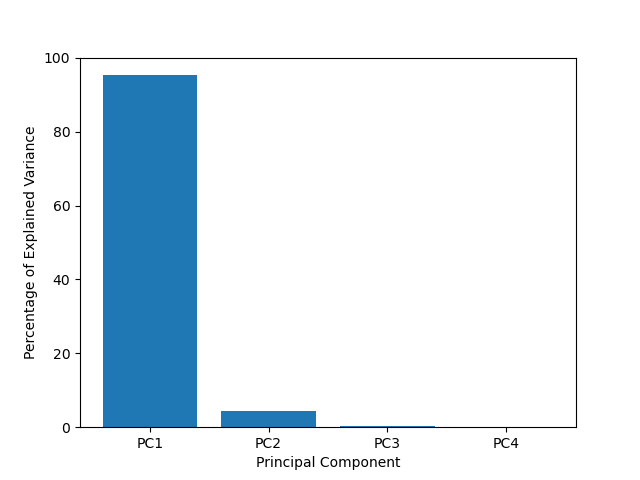

In [15]:
%matplotlib widget
spree_plot(pca_train)

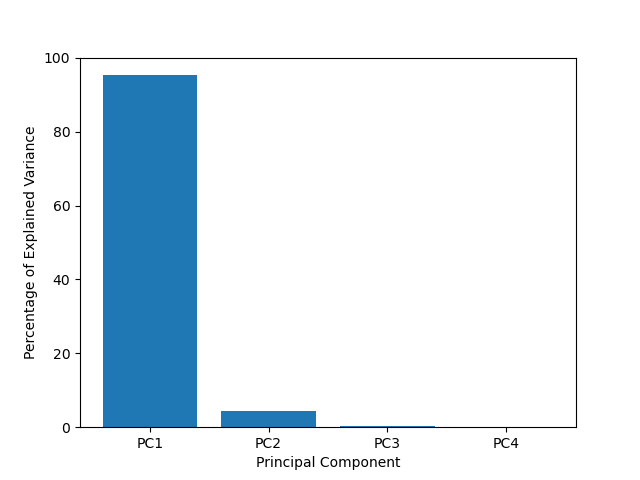

In [11]:
%matplotlib widget
spree_plot(pca_test)

Text(0, 0.5, 'PC2 - 4.3%')

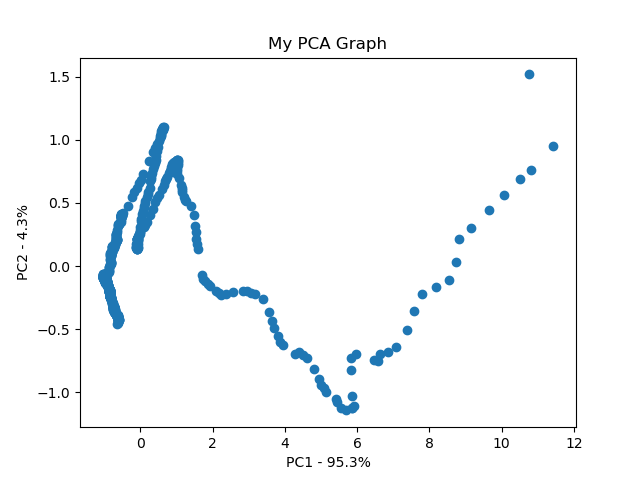

In [16]:
fig, ax = plt.subplots()
per_var = np.round(pca_train.explained_variance_ratio_* 100, decimals=1)
ax.scatter(X_train_PCA.PCA1, X_train_PCA.PCA2)
ax.set_title('My PCA Graph')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))

In [13]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
        
# caluclate Mahalanobis distance

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

# outlier detection

def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

# threshold for the classificiation beyond which is an anomaly

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

# check if matrix is postive definite

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [14]:
cov_matrix, inv_cov_matrix  = pca_test.get_covariance(), np.linalg.inv(pca_test.get_covariance())
# problemas con esto debido a que salen distintos valores de covarianza entre numpy y Sklearn

In [20]:
#cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
#mean_distr = data_train.mean(axis=0)
dist_test = MahalanobisDist(inv_cov_matrix, X_train.mean(axis = 0).values, X_test.values, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, X_train.mean(axis = 0).values, X_train.values, verbose=False)
threshold = MD_threshold(X_train.mean(axis = 0), extreme = True)

(array([238.,  24.,   9.,   3.,   7.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   2.]),
 array([ 0.29471421,  4.48805528,  8.68139636, 12.87473743, 17.06807851,
        21.26141958, 25.45476066, 29.64810173, 33.84144281, 38.03478388,
        42.22812496, 46.42146603, 50.61480711, 54.80814818, 59.00148926,
        63.19483033, 67.38817141, 71.58151248, 75.77485356, 79.96819463,
        84.16153571]),
 <BarContainer object of 20 artists>)

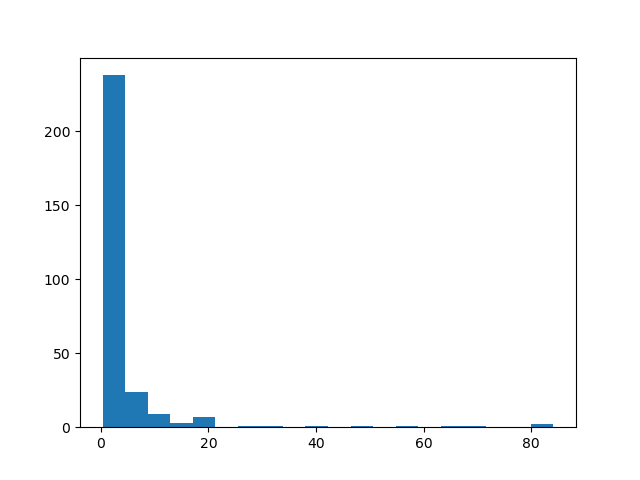

In [27]:
%matplotlib widget
fig,ax = plt.subplots()
ax.hist(np.square(dist_test),bins = 20)